In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Random Forest
The Random Forest algorithm improves on the balance problem found with the Decision Tree algorithm as it limits overfitting without substantially increasing error due to bias.

In [2]:
# evaluate random forest algorithm for classification
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import ValidationCurve

<IPython.core.display.Javascript object>

In [3]:
# Read in CSV
data = pd.read_csv("../5_profiles/reduced_dim_5.csv")

<IPython.core.display.Javascript object>

In [4]:
data

,profile,.NET,ASP.NET,AWS,AWS S3,Adobe Photoshop,Agile,Agile Methodology,Agile Software Development,Ajax,...,Version Control,Visual,Visual Studio,Web API,Windows,Wireframing,WordPress,Written English,jQuery,js
0,Fullstack,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Frontend,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,ML,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ML,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,QA,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,Frontend,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771,Frontend,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
772,Frontend,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
773,ML,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [5]:
# Assign all columns besides the profile col as the input variables (X)
X = data.iloc[:, 1:]
# Assign the profile col as the output variable (y)
y = data.iloc[:, 0]

<IPython.core.display.Javascript object>

In [6]:
# Split to the data to test & train data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

# Evaluating the model by Cross Validation
When using machine learning algorithms which implement stochastic learning algorithms, it's good practice to evaluate them by averaging their performance across multiple runs or repeats of cross-validation. When fitting a final model, it may be a good idea to either increase the number of trees until the variance of the model is reduced across repeated evaluations, or to fit multiple final models and average their predictions.

In [7]:
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_repeats=3, random_state=1)
n_scores = cross_val_score(
    model, X, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise"
)
# report performance
print("Accuracy: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

Accuracy: 0.731 (0.035)


<IPython.core.display.Javascript object>

# Hypertuning Algorithm Parameters

## Exploring the Tree's Depth (max_depth)
The maximum number of levels in each decision tree making up the Random Forest. Each Decision Tree has to an arbitrary depth and is not pruned. Deeper trees are often more overfit to the training data, but are also less correlated, which in turn may improve the performance of the ensemble.

c:\users\oefel\.virtualenvs\celerative_working-mkc17mr_\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


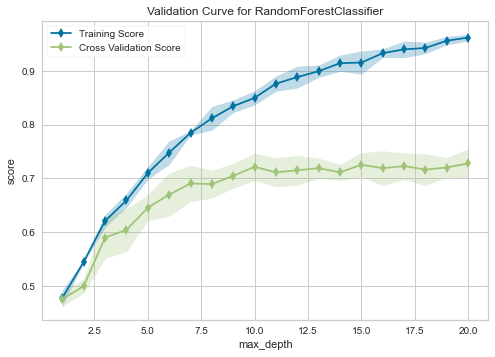

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

<IPython.core.display.Javascript object>

In [8]:
# @TODO Explain the Visualizer
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    RandomForestClassifier(),
    param_name="max_depth",
    param_range=np.arange(1, 21),
    cv=3,
    scoring="accuracy",
)

# Fit the visualizer
viz.fit(X, y)
# Show the visualizer
viz.show()

In [9]:
# get list of models to evaluate
def get_models():
    models = dict()
    # consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1, 16)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models


# evaluate given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_repeats=3, random_state=0)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
    return scores

<IPython.core.display.Javascript object>

### Interpreting the Plot
The Box & Whisker aligns with Validation Curve generated above in that peak accuracy is acheived at tree depths exceeding 10.

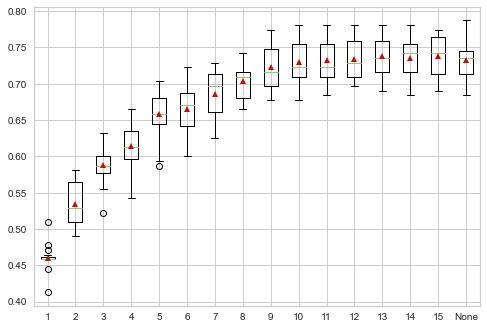

<IPython.core.display.Javascript object>

In [10]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
#     print(">%s %.3f (%.3f)" % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Exploring the Number of Features (max_features)
The number of features that are randomly sampled at each split point. This is perhaps the most important feature to configure for random forest!

c:\users\oefel\.virtualenvs\celerative_working-mkc17mr_\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


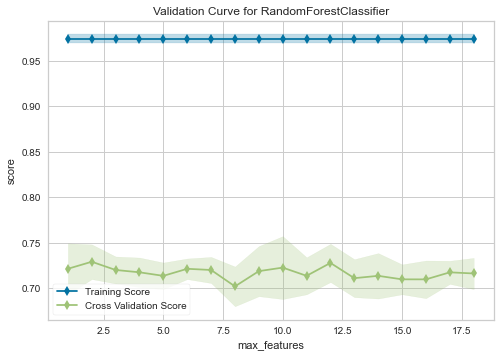

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_features', ylabel='score'>

<IPython.core.display.Javascript object>

In [11]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    RandomForestClassifier(),
    param_name="max_features",
    param_range=np.arange(1, 19),
    cv=3,
    scoring="accuracy",
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

### Interpreting the Plot
It's clear that setting the max_features argument will not significantly impact algorithm performance as results are too stochastic to reveal any clear pattern. 

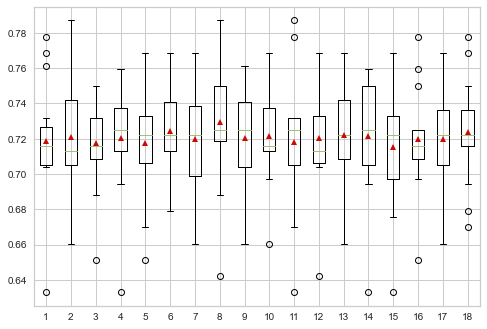

<IPython.core.display.Javascript object>

In [12]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore number of features from 1 to 38
    for i in range(1, 19):
        models[str(i)] = RandomForestClassifier(max_features=i)
    return models


# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(
        model, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1
    )
    return scores


models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
#     print(">%s %.3f (%.3f)" % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Exploring the Number of Trees (n_estimators)
The number of trees used in the forest.

In [13]:
n_estimators = [10, 100, 1000]
max_features = ["sqrt", "log2"]
# define grid search
grid = dict(n_estimators=n_estimators, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid,
    n_jobs=-1,
    cv=cv,
    scoring="accuracy",
    error_score=0,
)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.741886 using {'max_features': 'log2', 'n_estimators': 100}
0.729426 (0.039279) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.735875 (0.046824) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.738040 (0.046577) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.724226 (0.047677) with: {'max_features': 'log2', 'n_estimators': 10}
0.741886 (0.049217) with: {'max_features': 'log2', 'n_estimators': 100}
0.741503 (0.048470) with: {'max_features': 'log2', 'n_estimators': 1000}


<IPython.core.display.Javascript object>

### Interpreting the Results
log2 of total features (118) falls between 6-7 max_features, a number which aligns with the resuts previously returned with yellowbrick's validation curve graph. We can see that whether the random forest algorithm is trained on 10, 100 or 1000 trees doesn't make much of a difference to algorithm performance.

In [14]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(max_features=15, max_depth=14)
# evaluate the model
cv = RepeatedStratifiedKFold(n_repeats=3, random_state=1)
n_scores = cross_val_score(
    model, X, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise"
)
# report performance
print("Accuracy: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

Accuracy: 0.742 (0.032)


<IPython.core.display.Javascript object>

# Implementing Random Forest as a Binary Algorithm with OneVRest & OneVOne

*from sklearn.multiclass import OneVsRestClassifier*
<br>
The (OneVRest) OVR method splits a multi-class classification problem into multiple binary problems, generating one model for each class. A binary classifier is trained for each binary problem, and predictions are made using the most confident model.

In [15]:
model = RandomForestClassifier(random_state=0)
n_classes = 5
ovr = OneVsRestClassifier(model)
ovr.fit(X_train, y_train)
y_pred = ovr.predict(X_test)
print(
    "Accuracy of random forest classifier on test set: {:.2f}".format(
        ovr.score(X_test, y_test)
    )
)

Accuracy of random forest classifier on test set: 0.75


<IPython.core.display.Javascript object>

*from sklearn.multiclass import OneVsOneClassifier*
<br>
The (OneVOne) OVO method also splits a multi-class classification problem into multiple binary problems, however, a dataset is created for each class vs class scenario.
The number of datasets is equal to: (NumClasses * (NumClasses – 1)) / 2

In [16]:
model = RandomForestClassifier(random_state=0)
n_classes = 5
ovo = OneVsOneClassifier(model)
ovo.fit(X_train, y_train)
y_pred = ovo.predict(X_test)
print(
    "Accuracy of random forest classifier on test set: {:.2f}".format(
        ovo.score(X_test, y_test)
    )
)

Accuracy of random forest classifier on test set: 0.76


<IPython.core.display.Javascript object>

### Interpreting the Results
The OVO method provides an almost neglible improvement to algorithm performance over OVR, perhaps because OVO maintains the ratio of class samples, while the way OVR works actually creates class imbalance. It seems that so long as the problem doesn't consist of a great deal of classes, there is little advantages to converting a mutli-class problem to a binary one when implementing the Random Forest algorithm.